## Theoretical background

The discretizing process is all about selecting some discrete points to represent the best a continuous space. One way to evaluate a discretization is to check for the __error__ it creates. I call this __error__  $ME$ (Mean Error) and it is actually the average distance of all the continuous points of that space, to their nearest discrete ones.

Before digging into the maths, i will explain some basic annotation.
* $n$ is always the number of dimensions of our space.
* $x$ is the variable vector point in that space
* $k$ is the number of the discrete points
* $x_{i}$ is the i-th discrete point
* $a$,$b$ is the start and the end of the space ($a\neq b$)

Lets assume at the beginning we have a __signle dimensional__ ($n = 1$) continuous range and __one__ ($k=1$) point $x_{0}$ inside that range. The distance to any other point  $x$  is the Eucledian distance which for  $n=1$  equals to  $|x-x_{0}|$. The corresponding $ME$ for that dicretizations is the average distance to any other point in the given range $(a, b)$.

$$ ME(x_0) = \large\frac{\int_{a}^{b}|x-x_0|dx}{b-a} $$

Solving this integral gives us:
$$ ME(x_0) = \large\frac{x_0^2 + (a+b)x_0+\frac{a^2+b^2}{2}}{b-a}$$

The result is a quadratic function. The goal is to find the $x_0$ that minimizes $ME$.

  
$$  ME' = \frac{2x_0-a-b}{b-a} $$

$$  ME' = 0  \Leftrightarrow  $$
  
$$  x_0 = \frac{a+b}{2} $$

As expected, the minimum is located a the center and its value is...

$$ ME(x_0) = \dots = \frac{b-a}{4} $$


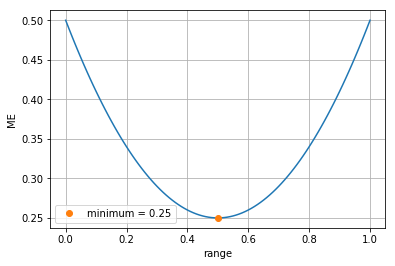

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def ME(x_0, a, b):
    return (x_0**2 - (a+b)*x_0 + (a**2 + b**2)/2)/(b-a)

# ex. a=0, b=1
a = 0
b = 1
x = np.linspace(a, b, 101)
y = list(ME(x_i, a, b) for x_i in x)

x_min = (a+b)/2
y_min = ME(x_min, a, b)

plt.plot(x, y)
plt.plot(x_min, y_min, 'o', label='minimum = {}'.format(y_min))
plt.xlabel('range')
plt.ylabel('ME')
plt.grid(True)
plt.legend()
plt.show()

To decrease further this error, or to increase the precision of our discretization, we can add more discrete points. Then the $ME$ will be the average of the mean error of each point.

$$ ME = \frac1k\sum_{i=0}^{k}ME(x_i) $$

Now we need to find where to place all these points, and what ranges to assign to each.

Actually the ranges are assigned automatically due to the fact that we calculate the mean error from the __nearest__ discrete point. So the range of each point is __half the distance__ to its nearest neighbor point or the limits $a,b$. What we did actually is that we split our initial range $[a, b]$ to $k$ sub-ranges $[a_0, b_0], [a_1, b_1], \dots, [a_k-1, b_k-1]$ where the end of one sub-range is the beggining of the next.


discrete points [0.26190755 0.45366691 0.5918807  0.83391025]
ranges [0, 0.3577872257872833, 0.5227738031864219, 0.7128954768027662, 1] 

ME(0.261907545706786, a=0, b=0.3577872257872833) = 0.10870773178014267
ME(0.4536669058677806, a=0.3577872257872833, b=0.5227738031864219) = 0.04233276588177973
ME(0.5918807005050631, a=0.5227738031864219, b=0.7128954768027662) = 0.0510734493600706
ME(0.8339102531004694, a=0.7128954768027662, b=1) = 0.07354530614364786


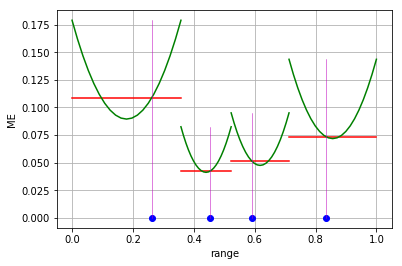

mean error 0.06891481329141022


In [49]:
# pick 4 random points in range [0, 1]
k = 4
x_is = np.sort(np.random.uniform(a, b, size=k))
print('discrete points', x_is)
# compute the ranges of each point
ranges = [a]
for i in range(len(x_is)-1):
    ranges.append((x_is[i]+x_is[i+1])/2)
ranges.append(b)
print('ranges', ranges,'\n')
# plot
MEs = list(ME(x_is[i], ranges[i], ranges[i+1]) for i in range(len(x_is)))
for i in range(len(x_is)):
    print('ME({}, a={}, b={}) = {}'.format(x_is[i], ranges[i], ranges[i+1], MEs[i]))
    plt.plot(x_is[i], 0, 'bo')
    plt.plot([ranges[i], ranges[i+1]], [MEs[i]]*2, 'r')
    x = np.linspace(ranges[i], ranges[i+1], 21)
    y = list(ME(x_i, ranges[i], ranges[i+1]) for x_i in x)
    plt.plot(x, y, 'g')
    plt.plot([x_is[i], x_is[i]], [0, y[0]], 'm', linewidth=.5)

plt.xlabel('range')
plt.ylabel('ME')
plt.grid(True)
plt.show()
plt.show()

print('mean error', np.average(MEs))

The example above shows that even with a random discretization, the $ME$ is decreased by a great amount. Though, if we chose more wisely the locations of the points, we could achieve an even lower mean error.

One optimazation is to bring the points on the center of the ranges.